import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from google.colab import drive

import and read dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Final Requirements Datasets/List of Regular Travelers in the Philippines.csv')

In [4]:
df

,region,province_or_city,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
0,NCR (National Capital Region),NCR (National Capital Region),1513402,20048,909212,2442662
1,NCR (National Capital Region),Caloocan City,-,-,-,0
2,NCR (National Capital Region),Las Pinas City,-,-,-,0
3,NCR (National Capital Region),Makati City,-,-,-,0
4,NCR (National Capital Region),Malabon City,-,-,-,0
...,...,...,...,...,...,...
338,DISTRIBUTION OF REGIONAL TRAVELLERS IN THE PHI...,NaN,NaN,NaN,NaN,NaN
339,January-December 2012,NaN,NaN,NaN,NaN,NaN
340,Source of Data: Accommodation Establishments ...,NaN,NaN,NaN,NaN,NaN
341,Prepared by: Tourism Research and Statistics ...,NaN,NaN,NaN,NaN,NaN


set values needed for visualization

In [11]:
# get total number of tourists by region
regions = list(df[:336]['region'].value_counts().index)
list_regions = []
for i in regions:
  list_regions.append(df[df['region'] == str(i)].iloc[0])
total_by_region = pd.DataFrame(list_regions, columns=list_regions[0].index).set_index('region')
total_by_region = total_by_region.drop(['province_or_city'], axis=1).astype(int)
total_by_region

,foreign_travelers,overseas_filipino,domestic_travelers,total_2012
region,,,,
VII (Central Visayas),1161575,16121,1750385,2928081
VIII (Eastern Visayas),27578,1212,461682,490472
IV-B (MIMAROPA),211534,9514,911808,1132856
I (Ilocos Region),36172,586,633712,670470
VI (Western Visayas),606521,58169,2434328,3099018
NCR (National Capital Region),1513402,20048,909212,2442662
X (Northern Mindanao),50918,10091,1421811,1482820
Region XIII (CARAGA),42154,3146,699347,744647
XII (SOCCSKSARGEN),12666,1,268807,281474


In [ ]:
# get grand total number of travelers
grand_total = pd.to_numeric(df[df['region'] == 'Grand Total'].iloc[:, 2:-1].iloc[0])
grand_total

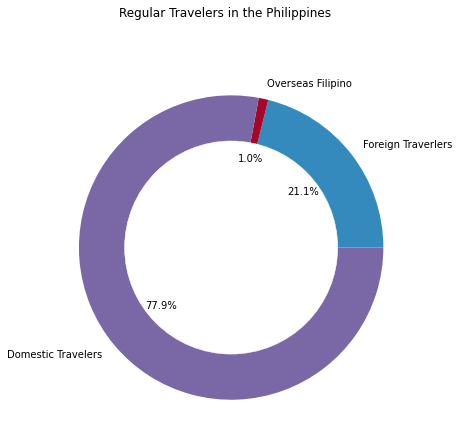

In [6]:
# create pie chart
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(grand_total, labels=['Foreign Traverlers', 'Overseas Filipino', 'Domestic Travelers'], autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
fig.suptitle('Regular Travelers in the Philippines')
fig.show()

In [ ]:
total_by_region.total_2012.sort_values()

In [8]:
# get top five regions with highest total travelers
top_five = total_by_region.sort_values(['total_2012'])[-1:-6:-1]
top_five = top_five[['foreign_travelers', 'domestic_travelers']]
top_five = top_five.transpose()
top_five

region,V (Bicol Region),VI (Western Visayas),VII (Central Visayas),NCR (National Capital Region),III (Central Luzon)
foreign_travelers,712707,606521,1161575,1513402,344329
domestic_travelers,2911919,2434328,1750385,909212,1719532


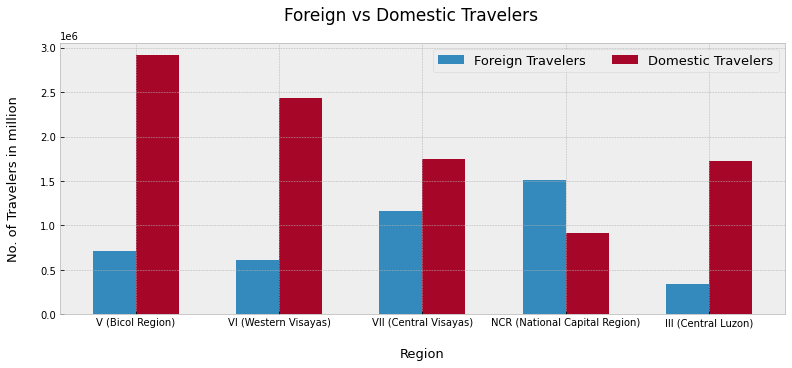

In [17]:
# set variables
x = top_five.columns
x_axis = np.arange(len(x))

# create a bar chart
fig, ax = plt.subplots(figsize=(13,5))
width = 0.30
j = 1

for i in top_five.index:
  ax.bar(x_axis+width*j, top_five.loc[i], width=0.30)
  width = 0.30
  j = j + 1

plt.xticks(x_axis + width*1.5, x)
ax.set_xlabel('Region', fontsize=13, labelpad=20)
ax.set_ylabel('No. of Travelers in million', fontsize=13, labelpad=20)
fig.suptitle('Foreign vs Domestic Travelers', fontsize=17)
ax.legend(['Foreign Travelers', 'Domestic Travelers'], loc='upper right', prop={'size': 13}, ncol = 3)
fig.show()